Note:

This is the code I developed while I was recording the course's videos. So this contains the exact code I was writing in the videos.

# Load libraries

In [65]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sb

%matplotlib notebook

# Load dataset

In [2]:
# transform variable
transform = transforms.Compose([
    
    
    # to tensor
    transforms.ToTensor(),
    
    
    # normalize
    # from [0,1] to [-1, 1]
    # parameters: (means), (std)
    transforms.Normalize(
        (0.5, 0.5, 0.5),
        (0.5, 0.5, 0.5)
    )
])

In [3]:
# batch size 
batch_size = 128

# load train dataset
trainset = torchvision.datasets.CIFAR10(
    root = "./data",
    download = True,
    train = True,
    transform = transform,
)


# create dataloader
trainLoader = torch.utils.data.DataLoader(
    
    trainset, 
    
    batch_size = batch_size,
    
    shuffle = True,
    
    num_workers = 2,
    
)

# load valid and testa data
testValidSet = torchvision.datasets.CIFAR10(
    root = "./data",
    download = True,
    train = False,
    transform = transform,
)

# split dataset
validSet, testSet = torch.utils.data.random_split(
    testValidSet,
    [5000, 5000]
)

# create valid dataloader
validLoader = torch.utils.data.DataLoader(
    validSet,
    batch_size = batch_size,
    shuffle = False,
    num_workers = 2,
)


# createa test dataloader
testLoader = torch.utils.data.DataLoader(
    testSet,
    shuffle = False,
    num_workers = 2,
)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# set classes
classes = [
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

# Visualize data

In [5]:
# function to display image
def imgShow(img):
    
    # unnormalize
    # from [-1, 1] to [0, 1]
    img = img / 2 + 0.5
    
    # to numpy
    img = img.numpy()
    
    # transpose 
    # from [channels, height, width] to [height, width, channels]
    imgTransposed = np.transpose(img, (1, 2, 0))
    
    # plot image
    plt.imshow(imgTransposed)
    
    # display
    plt.show()

<IPython.core.display.Javascript object>


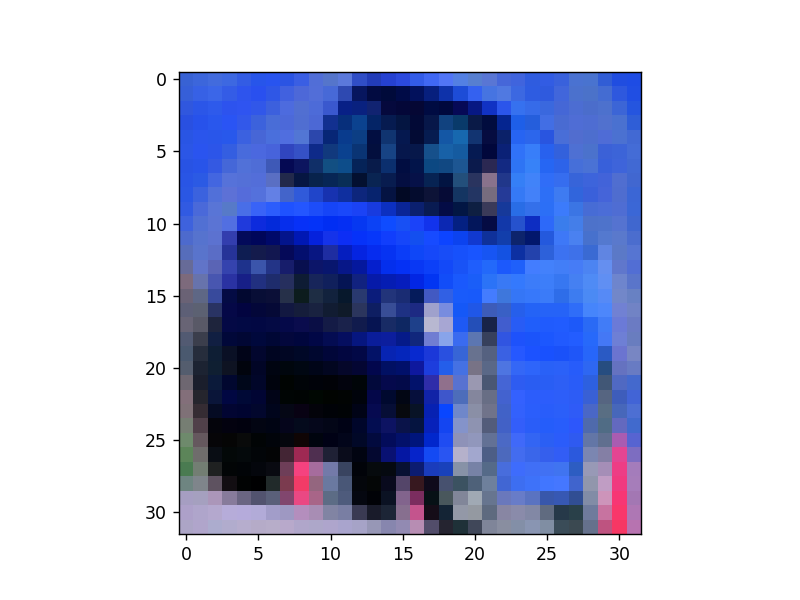

car
torch.Size([3, 32, 32])


In [6]:
# call iter method on iterable object
dataIter = iter(trainLoader)

# get first element on iterable
images, labels = dataIter.next()

# select image
imageIdx = 0


# show image
imgShow(images[imageIdx])
print(classes[labels[imageIdx]])
print(images[imageIdx].shape)

# Define CNN model

In [68]:
# define model
# method
# init: define layers
# forward: data flows thoruh the model
class CNN(nn.Module):
    
    # define init method
    def __init__(self, hidden_layer = 1000):
        
        # load initial informaiton from parent
        super().__init__()
        
        
        # conv 1
        # [input channels, output channels (feature maps), kernel size]
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        # pooling layer
        # kernel size, stride
        self.pool = nn.MaxPool2d(2, 2) 
        
        # fully connecetd layer
        # input dimension, outputsimen
        self.fc1 = nn.Linear(1176, hidden_layer)
        
        # outputlayer
        # input dim, output dim
        self.out = nn.Linear(hidden_layer, 10)
        
        # activation function
        self.act = nn.ReLU()
        
    
    # define forward methd
    def forward(self, x):
        
#         print(x.shape)
        
        # convolution 1
        x = self.act(self.conv1(x))
        
#         print(x.shape)
        
        
        # pooling layer
        x = self.pool(x)
        
#         print(x.shape)
        
        
        # flattening
        # [batch size, multiplication of dimensions]
        x = x.view(-1, 6*14*14)
        
#         print(x.shape)
        
        
        # fc1
        x = self.act(self.fc1(x))
        
#         print(x.shape)
        
        # ouput layer
        x = self.out(x)
        
#         print(x.shape)
        
        # return ouput
        return x

In [69]:
# define model
model = CNN()

In [70]:
# call iter method
dataIter = iter(trainLoader)

# get first item
images, labels = dataIter.next()

# pass data to model
test = model.forward(images)

In [71]:
print(test.shape)

torch.Size([128, 10])


# Define cost function and optimizer

In [72]:
# cost function
costFunction = nn.CrossEntropyLoss()

# optimizer (to update parameters)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

# Train model

<IPython.core.display.Javascript object>


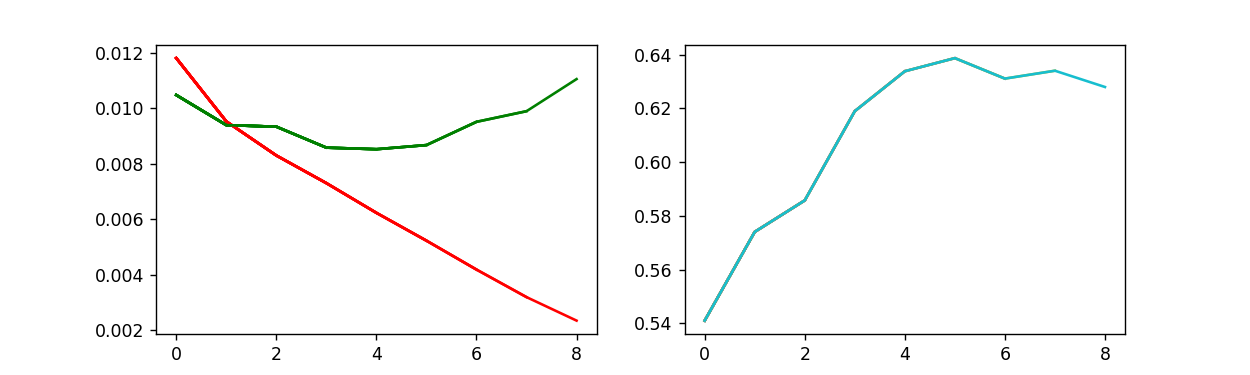

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9


In [73]:
# define epochs 
epochs = 10

# create plot
fig, ax = plt.subplots(1, 2, figsize = (10, 3))

# train loss array
trainLossArray = np.zeros(shape = (epochs))

# valid loss array
validLossArray = np.zeros(shape = (epochs))


# metric array
metricArray = np.zeros(shape = (epochs))


# iterate on epochs
for i in range(epochs):
    
    print(f"epoch {i}")
    
    # TRAINING
    
    # loss epoch train
    epoch_train_loss = 0
    
    # iterate on batches on trainingset
    for tmp in trainLoader:
        
        # data
        data = tmp[0]
        
        # labels
        labels = tmp[1]
        
        # get model predictions
        predictions = model.forward(data)
        
        # cost function value
        loss = costFunction(predictions, labels)
        
        # gradient to zero
        optimizer.zero_grad()
        
        # compute graidnet value using backprograpgion
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        # sum loss values
        epoch_train_loss += loss.item()
        
    # add loss value of the ireation
    trainLossArray[i] = epoch_train_loss / 50000
    
    
    
    # VALIDATION
    
    # error valid epoch
    epoch_valid_loss = 0
    
    # metric valid epoch
    metric_valid = 0
    
    # bathc counter
    batch_counter = 0
    
    for tmp in validLoader:
        
        # labels
        labelsVal = tmp[1]
        
        # data
        dataVal = tmp[0]
        
        # get predictions
        predictionsVal = model.forward(dataVal)
        
        # get cost function value
        lossVal = costFunction(predictionsVal, labelsVal)
    
        # su of error values in each minibatch
        epoch_valid_loss += lossVal.item()
    
        # compute metric value in minibatch
        metric_valid += accuracy_score(
            
            # true values
            labelsVal,
            
            # prediction values
            torch.argmax(predictionsVal, 1).detach().numpy(),
        
        )
        
        # update counter batch
        batch_counter += 1
        
        
    # save te loss value epoch
    validLossArray[i] = epoch_valid_loss / 5000
    
    # save metric value epoch
    metricArray[i] = metric_valid / batch_counter
    
    
    
    # PLOT
    
    # plot train loss
    ax[0].plot(trainLossArray[0: i], c = "red")
    
    # plot valid loss
    ax[0].plot(validLossArray[0: i], c = "green")
    
    
    # plot metric
    ax[1].plot(metricArray[0: i])
    
    # plot
    fig.canvas.draw()

# Analize on test data and get metrics

In [74]:
# store predictions
predictionsTest = np.zeros(shape = (5000, ))

# store labels
labelsTest = np.zeros(shape = (5000))


# iterate on batches on trainingset
for idx, tmp in enumerate(testLoader):

    # data
    data = tmp[0]

    # labels
    labels = tmp[1]

    # get model predictions
    predictions = model.forward(data)
    
        
    # save prediciton
    predictionsTest[idx] = torch.argmax(predictions, 1).detach().numpy()
    
    # save labels
    labelsTest[idx] = labels

<IPython.core.display.Javascript object>


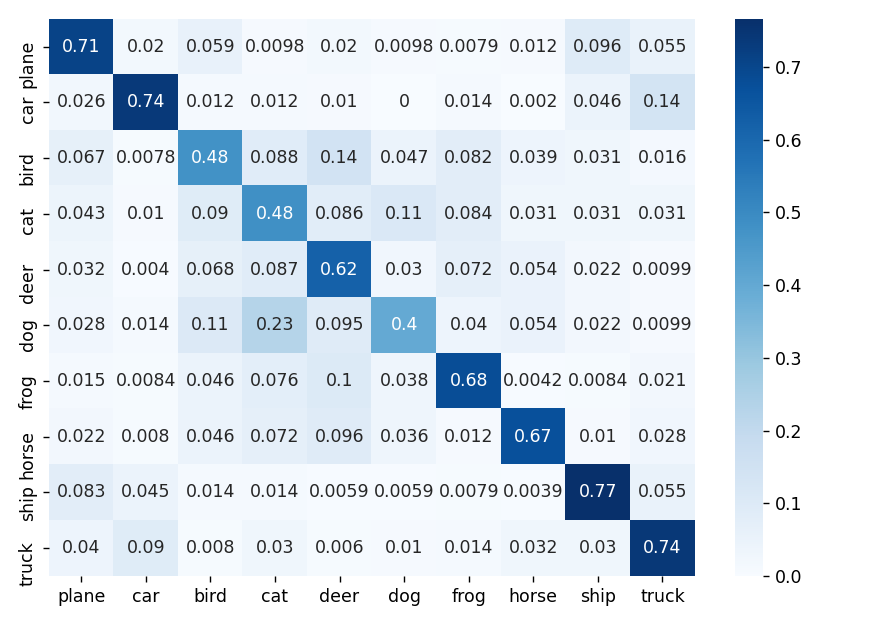

<AxesSubplot:>

In [75]:
# get confusion matrix
cm = confusion_matrix(
    
    # labels
    labelsTest,
    
    # predictions
    predictionsTest,
    
    # normalize
#     normalize = None
    normalize = "true"
)

# plot the cm
fig, ax = plt.subplots(figsize = (7, 5), tight_layout = True)

sb.heatmap(
    
    cm,
    
    annot = True,
    
    # change colors
    cmap = plt.cm.Blues,
    
    # change to axis
    yticklabels = [x for x in classes],
    xticklabels = [x for x in classes],
    
)

In [76]:
print(
    classification_report(
        # labels
        labelsTest,

        # predictions
        predictionsTest,

    )
)

              precision    recall  f1-score   support

         0.0       0.67      0.71      0.69       508
         1.0       0.78      0.74      0.76       498
         2.0       0.52      0.48      0.50       511
         3.0       0.43      0.48      0.46       490
         4.0       0.53      0.62      0.57       503
         5.0       0.58      0.40      0.47       503
         6.0       0.66      0.68      0.67       476
         7.0       0.74      0.67      0.71       502
         8.0       0.72      0.77      0.74       509
         9.0       0.67      0.74      0.70       500

    accuracy                           0.63      5000
   macro avg       0.63      0.63      0.63      5000
weighted avg       0.63      0.63      0.63      5000



1) model 1: Accuracy 0.59

2) model 2: Accuracy 0.63